## # Introduction
<p><img src="https://i.imgur.com/kjWF1So.jpg" alt="Different characters on a computer screen"></p>
<p>According to a 2019 <a href="https://storage.googleapis.com/gweb-uniblog-publish-prod/documents/PasswordCheckup-HarrisPoll-InfographicFINAL.pdf">Google / Harris Poll</a>, 24% of Americans have used common passwords, like <code>abc123</code>, <code>Password</code>, and <code>Admin</code>. Even more concerning, 59% of Americans have incorporated personal information, such as their name or birthday, into their password. This makes it unsurprising that 4 in 10 Americans have had their personal information compromised online. Passwords with commonly used phrases and personal information makes cracking a password drastically easier.</p>
<p>You may have noticed over the years that password requirements have increased in complexity, including recommendations to change your passwords every couple of months. Compiled from industry recommendations, below is a list of passwords requirements you will be asked to test: </p>
<p><strong>Password Requirments:</strong></p>
<ol>
<li>Must be at least 10 characters in length</li>
<li>Must contain at least:<ul>
<li>one lower case letter </li>
<li>one upper case letter </li>
<li>one numeric character </li>
<li>one non-alphanumeric character</li></ul></li>
<li>Must not contain the phrase <code>password</code> (case insensitive)</li>
<li>Must not contain the user's first or last name, e.g., if the user's name is <code>John Smith</code>, then <code>SmItH876!</code> is not a valid password.</li>
</ol>
<p>Here is the dataset that you will investigate this project:</p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/logins.csv</b></div>
Each row represents a login credential. There are no missing values and you can consider the dataset "clean".
<ul>
    <li><b>id:</b> the user's unique ID.</li>
    <li><b>username:</b> the username with the format {firstname}.{lastname}.</li>
    <li><b>password:</b> the password that may or may not meet the requirements. <i>Note, passwords should never be saved in plaintext, always encrypt them when working with real live passwords!</i></li>
</ul>
</div>
<p>Warning: This dataset contains some <strong>real</strong> passwords leaked from <strong>real</strong> websites. These passwords have been filtered, but may still include words that are explicit and offensive.</p>
<p>From here on out, it will be your task to explore and manipulate the existing data until you can answer the two questions described in the instructions panel. Feel free to import as many packages as you need to complete your task, and add cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> To complete this project, you need to know how to manipulate strings in pandas DataFrames and be familiar with regular expressions. Before starting this project we recommend that you have completed the following courses: <a href="https://learn.datacamp.com/courses/data-cleaning-in-python">Data Cleaning in Python</a> and <a href="https://learn.datacamp.com/courses/regular-expressions-in-python">Regular Expressions in Python</a>.</p>

# Solution

In [1]:
import numpy as np
import pandas as pd
import re

# Data acquisition
df = pd.read_csv('datasets/logins.csv')

# Exploratory data analysis
display(df.head(n=5))
print('There are %s lines in the dataset'%df.shape[0])

,id,username,password
0,1,vance.jennings,vanceRules888!
1,2,consuelo.eaton,Mail_Pen%Scarlets.414
2,3,mitchel.perkins,Z00+1960
3,4,odessa.vaughan,D-rockyou
4,5,araceli.wilder,Araceli}r3


There are 982 lines in the dataset


In [2]:
# To check whether the passwords requirements are fulfilled, passwords have to be
# compared with first and last names (case insensitive). 
# We extract the first and last names from the 'username' column and we create
# a new column which contains the passwords converted to lower case.

df['firstnames'] = df.apply((lambda x: x['username'].split('.')[0]),axis=1)
df['lastnames'] = df.apply((lambda x: x['username'].split('.')[1]),axis=1)
df['password_lower'] = df.apply((lambda x: x['password'].lower()),axis=1)

**There are 4 password requirements. The idea is to analyse whether each of the requirements is fulfilled and to store the answer in 4 different columns (which contain boolean values). It is then straightforward to deduce when all requirements are fulfilled.**

TypeError: Argument 'obj' has incorrect type (expected list, got DataFrame)

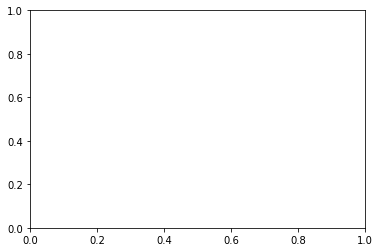

In [3]:
%matplotlib inline
# Condition 1: Must be at least 10 characters in length

df['condition1'] = df.apply((lambda x: len(x['password'])>=10),axis=1)

# Condition 2: Must contain at least: one lower case letter, 
#              one upper case letter, one numeric character, 
#              one non-alphanumeric character

def condition2(x):
    regs = ['[a-z]','[A-Z]','[0-9]','[^a-zA-Z0-9_]']
    output = True

    for reg in regs:
        output = output & bool(re.search(reg,x['password']))
    
    return output

df['condition2'] = df.apply(condition2,axis=1)
    
# Condition 3: Must not contain the phrase password (case insensitive)

df['condition3'] = df.apply((lambda x: 'password' not in (x['password_lower'])),axis=1)

# Condition 4: Must not contain the user's first or last name, e.g., 
#              if the user's name is John Smith, 
#              then SmItH876! is not a valid password.

def condition4(x):
    condition4a = x['firstnames'] not in (x['password_lower'])
    condition4b = x['lastnames'] not in (x['password_lower'])
    return (condition4a and condition4b)

df['condition4'] = df.apply((condition4),axis=1)

df['all_conditions'] = df.apply(lambda x: x['condition1'] & x['condition2'] \
                                & x['condition3'] & x['condition4'],axis=1)

columns_to_keep = ['id','username','password','all_conditions']

df = df[columns_to_keep]

good_pass =  df['all_conditions'].sum() / df.shape[0]

bad_pass = float(round(1.0-good_pass,2))

email_list = df[~df['all_conditions']]['username'].sort_values().reset_index(drop=True)

print(email_list)